In [5]:
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.stats import mannwhitneyu

In [6]:
df = pd.read_csv("data_cleaned.csv")

In [5]:
print(df.columns)

Index(['url', 'name', 'owner', 'forks', 'stars', 'languages', 'commits',
       'creation_date', 'contributors', 'topics', 'watchers', 'readme',
       'releases', 'pull_requests', 'readme_size', 'commits_freq',
       'releases_freq', 'lines_of_codes', 'popularity_score_1',
       'popularity_score_2', 'popularity_score_3', 'forks_outlier_flag',
       'watchers_outlier_flag', 'stars_outlier_flag',
       'releases_freq_outlier_flag', 'pull_requests_outlier_flag',
       'readme_size_outlier_flag', 'lines_of_codes_outlier_flag'],
      dtype='object')


In [ ]:
def convert_columns_to_float32(df, columns):
    for col in columns:
        df[col] = df[col].astype('float32')
    return df


def prepare_data():
    df_cleaned = pd.read_csv("data_cleaned.csv")

    # Specify the input and target columns
    input_columns = ["forks", "watchers", "releases_freq", "pull_requests", "readme_size", "lines_of_codes"]
    target_column = "stars"

    # Convert int64 to float32
    df_cleaned = convert_columns_to_float32(df_cleaned, input_columns+[target_column])


    # Extract the input and target data
    X = df_cleaned[input_columns]
    y = df_cleaned[target_column]

    # Split the data into training and testing sets with a fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize using only training set statistics
    dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
    for k, dtype in dtypes:
        if dtype == "float32":
            mean = X_train[k].mean()
            std = X_train[k].std()

            # Apply normalization
            X_train.loc[:, k] = (X_train[k] - mean) / std
            X_test.loc[:, k] = (X_test[k] - mean) / std

    print("X_train: {}".format(X_train.shape))
    print("y_train: {}".format(y_train.shape))
    print("X_test: {}".format(X_test.shape))
    print("y_test: {}".format(y_test.shape))

    return X_train, X_test, y_train, y_test, dtypes

In [9]:
df = pd.read_csv('AI_repos.csv')
print(len(df))
fs = df.head(6545)

#first_row = df.iloc[0]
#feature_value = df.iloc[0]['creation_date']
# str = "2012-09-24T02:58:25Z"
# date = pd.to_datetime(str)
date2017 = pd.to_datetime("2017-06-12T17:57:34Z")
# print(date2017 > date)

#print(feature_value)

print(fs[pd.to_datetime(fs["creation_date"]) > date2017])
#fs[pd.to_datetime(fs["creation_date"]) > date2017].to_csv("after2017")
af = fs[pd.to_datetime(fs["creation_date"]) > date2017]
be = fs[pd.to_datetime(fs["creation_date"]) < date2017]


6545
                                                    url  \
0      https://api.github.com/repos/0b01/SimGAN-Captcha   
1               https://api.github.com/repos/0hq/WebGPT   
2        https://api.github.com/repos/0ssamaak0/DLTA-AI   
3     https://api.github.com/repos/0x454447415244/Ha...   
4            https://api.github.com/repos/gngpp/opengpt   
...                                                 ...   
6537  https://api.github.com/repos/zyddnys/manga-ima...   
6538         https://api.github.com/repos/zyfra/ebonite   
6540  https://api.github.com/repos/Zymrael/awesome-n...   
6541       https://api.github.com/repos/zyx0814/Pichome   
6542    https://api.github.com/repos/zzh8829/yolov3-tf2   

                              name           owner  forks  stars  \
0                   SimGAN-Captcha            0b01     80    435   
1                           WebGPT             0hq    209   3668   
2                          DLTA-AI       0ssamaak0     39    333   
3     Handwrit

In [17]:
pvalue_sum = 0
for i in range(1000):
    after = af.sample(n=1369)
    before = be.sample(n=1369)
    str = "popularity_score_2" #ttest feature
    af_training = after.loc[:,str]
    be_training = before.loc[:,str]
    # nomalization
    afmean = af_training.mean()
    afstd = af_training.std()
    
    af_training = (af_training-afmean) / afstd
    be_training = (be_training-afmean) / afstd
    statistic, pvalue = stats.ttest_rel(af_training, be_training)
    
    # print(stats.ttest_rel(af_training, be_training))
    statistic_u, pvalue_u = mannwhitneyu(af_training, be_training)
    pvalue_sum += pvalue
pvalue_avg = pvalue_sum / 1000
print(pvalue_avg)


0.047333642868856676


In [ ]:
# after.sort_values(by=['popularity_score_3'],ascending=True,inplace=True)
# after.plot(y='popularity_score_3', kind='bar')

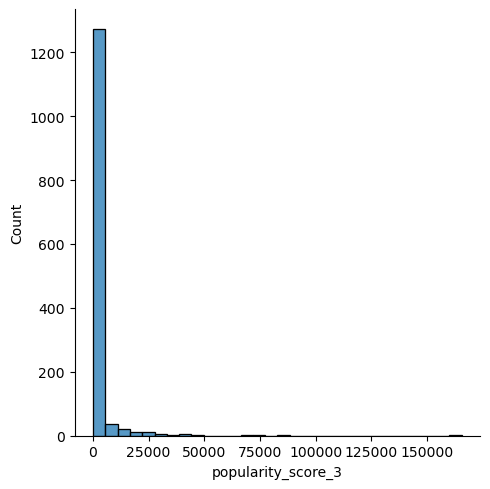

In [135]:
# x = (0, 70000, )
# y = norm.pdf(, df['popularity_score_3'].mean(), df['popularity_score_3'].std())
sns.displot(after['popularity_score_3'],kde = False,bins = 30)